<a href="https://colab.research.google.com/github/JuanaPinzonR/FEST/blob/main/7y8_FEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:

from __future__ import annotations
import numpy as np
import matplotlib.pyplot as plt

In [24]:

def posicion_final(N: int, trials: int, a: float = 1.0, p: float = 0.5, seed: int | None = None) -> np.ndarray:
    """
    Devuelve un vector con 'trials' para una marcha aleatoria 1D de N pasos.
    """
    rng = np.random.default_rng(seed)
    n_right = rng.binomial(N, p, size=trials)
    return a * (2*n_right - N)


In [25]:

def densidad_gausiana(x: np.ndarray, N: int, a: float) -> np.ndarray:
    """
    Densidad gaussiana de media 0 y varianza N a^2.
    """
    var = N * (a**2)
    coef = 1.0 / np.sqrt(2.0 * np.pi * var)
    return coef * np.exp(-(x**2) / (2.0 * var))

In [26]:
def histogram_clt(N: int, trials: int, a: float = 1.0, tau: float = 1.0, seed: int | None = None):
    """
    Punto 7
    """
    x = posicion_final(N, trials, a=a, seed=seed)
    mean_x = float(np.mean(x))
    msd = float(np.mean(x**2))
    plt.figure()
    plt.hist(x, bins=100, density=True, edgecolor='none')
    xs = np.linspace(np.min(x), np.max(x), 800)
    plt.plot(xs, densidad_gausiana(xs, N, a))
    plt.xlabel("x")
    plt.ylabel("densidad")
    plt.title(f"Marcha aleatoria 1D: histograma (N={N}, trials={trials})")
    plt.show()

    return mean_x, msd

In [27]:


def msd_vs_N(N_list: list[int], trials: int, a: float = 1.0, tau: float = 1.0, seed: int | None = None):
    """
    Punto 8
    """
    rng = np.random.default_rng(seed)
    means = []
    msds = []
    for N in N_list:
        x = posicion_final(N, trials, a=a, seed=int(rng.integers(0, 2**31-1)))
        means.append(np.mean(x))
        msds.append(np.mean(x**2))

    N_arr = np.asarray(N_list, dtype=float)
    means = np.asarray(means, dtype=float)
    msds = np.asarray(msds, dtype=float)

    # Ajuste lineal:
    m, b = np.polyfit(N_arr, msds, 1)
    D_est = m / (2.0 * tau)

    plt.figure()
    plt.scatter(N_arr, msds, label="<x^2> sim")
    plt.plot(N_arr, m*N_arr + b, label=f"ajuste: m={m:.3f}, b={b:.3f}")
    plt.xlabel("N (número de pasos)")
    plt.ylabel("<x^2>")
    plt.title(f"<x^2> vs N (trials={trials})  →  D_est = {D_est:.4f}")
    plt.legend()


    return {
        "N": N_list,
        "mean_x": means,
        "msd": msds,
        "slope_m": m,
        "intercept_b": b,
        "D_est": D_est
    }


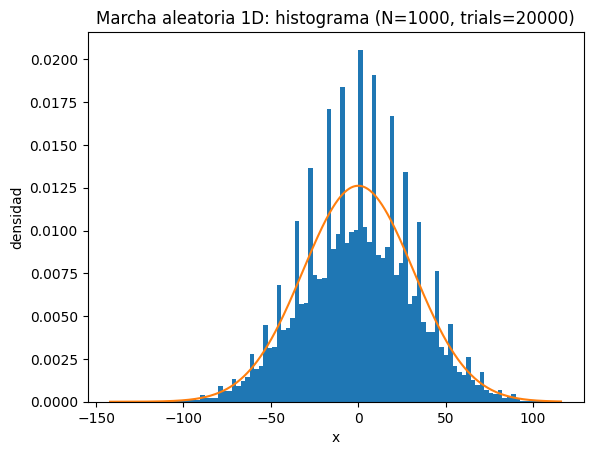

[P7] <x> ≈ 0.137,  <x^2> ≈ 991.159 (teórico: N a^2 = 1000.0)
[P8] m ≈ 0.98629, b ≈ 5.83583,  D_est = m/(2τ) ≈ 0.49315
    D teórico = a^2/(2τ) = 0.50000


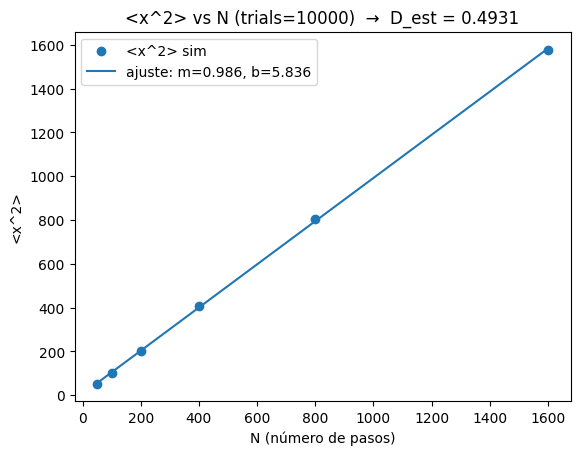

In [28]:
N = 1000
trials = 20000
a = 1.0
tau = 1.0
seed = 123

# Punto 7: histograma + gaussiana
mean_x, msd = histogram_clt(N, trials, a=a, tau=tau, seed=seed)
print(f"[P7] <x> ≈ {mean_x:.3f},  <x^2> ≈ {msd:.3f} (teórico: N a^2 = {N*a*a:.1f})")

#  Punto 8: <x^2> vs N + ajuste lineal
N_list = [50, 100, 200, 400, 800, 1600]
summary = msd_vs_N(N_list, trials//2, a=a, tau=tau, seed=seed)
print("[P8] m ≈ {:.5f}, b ≈ {:.5f},  D_est = m/(2τ) ≈ {:.5f}".format(
    summary["slope_m"], summary["intercept_b"], summary["D_est"]))
print("    D teórico = a^2/(2τ) = {:.5f}".format(a*a/(2*tau)))